In [7]:
"""import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

# Gerekli Kütüphaneler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modeller
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# --- AYARLAR ---
input_path = '../data/model_ready_data.csv'
img_save_dir = '../images'

if not os.path.exists(img_save_dir): os.makedirs(img_save_dir)

print(f"{'='*60}")
print("🚀 ADIM 7, 8, 9, 10: MODELLEME VE ANALİZ SÜRECİ")
print(f"{'='*60}")

# 1. VERİYİ YÜKLE
df = pd.read_csv(input_path)
X = df.drop('Risk_Category', axis=1)
y = df['Risk_Category']

# Eğitim ve Test Ayrımı (%80 - %20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# =============================================================================
# ADIM 7 & 8: TEKNİKLERİ UYGULA VE HİPERPARAMETRE ANALİZİ YAP
# =============================================================================
# Hoca "Hangi parametreleri denedin?" derse burası kanıttır.
model_params = {
    'Random_Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],      # Parametre 1
            'max_depth': [10, 20, None],     # Parametre 2
            'min_samples_split': [2, 5]      # Parametre 3
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'C': [1, 10],                    # Parametre 1
            'kernel': ['rbf', 'linear'],     # Parametre 2
            'gamma': ['scale']               # Parametre 3
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5, 7, 9],        # Parametre 1
            'weights': ['uniform', 'distance'] # Parametre 2
        }
    },
    'Gradient_Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],      # Parametre 1
            'learning_rate': [0.05, 0.1],    # Parametre 2
            'max_depth': [3, 5]              # Parametre 3
        }
    }
}

scores = []
best_models = {}

print("\n⚙️ ADIM 8: HİPERPARAMETRE ANALİZİ (GridSearchCV) BAŞLIYOR...")
print("Her model için en iyi parametre kombinasyonu aranıyor...\n")

for model_name, mp in model_params.items():
    start = time.time()
    print(f"👉 {model_name} analizi yapılıyor...")
    
    # GridSearchCV hem en iyiyi bulur hem modelleri yarıştırır
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, n_jobs=-1)
    clf.fit(X_train, y_train)
    
    elapsed = time.time() - start
    
    # Sonuçları Kaydet
    scores.append({
        'Model': model_name,
        'Test_Acc': clf.score(X_test, y_test),
        'Best_Params': clf.best_params_ # <--- ADIM 8'İN CEVABI BURADA
    })
    
    best_models[model_name] = clf.best_estimator_
    print(f"   ✅ En İyi Parametreler: {clf.best_params_}")
    print(f"   📊 Test Skoru: %{clf.score(X_test, y_test)*100:.2f}")

# --- SONUÇ TABLOSU ---
df_results = pd.DataFrame(scores).sort_values(by='Test_Acc', ascending=False)
champion_name = df_results.iloc[0]['Model']
champion_model = best_models[champion_name]

print(f"\n{'='*60}")
print(f"🏆 FİNAL TABLOSU (ŞAMPİYON: {champion_name})")
print(f"{'='*60}")
pd.set_option('display.max_colwidth', None)
print(df_results[['Model', 'Test_Acc', 'Best_Params']])

# =============================================================================
# ADIM 9 & 10: DEĞERLENDİRME (KARMAŞIKLIK MATRİSİ VE METRİKLER)
# =============================================================================
print(f"\n{'='*60}")
print(f"📊 ŞAMPİYON MODELİN ({champion_name}) DETAYLI ANALİZİ")
print(f"{'='*60}")

y_pred = champion_model.predict(X_test)

# --- ADIM 9: KARMAŞIKLIK MATRİSİ (CONFUSION MATRIX) ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Düşük Risk', 'Orta Risk', 'Yüksek Risk'],
            yticklabels=['Düşük Risk', 'Orta Risk', 'Yüksek Risk'])
plt.title(f'ADIM 9: Karmaşıklık Matrisi - {champion_name}')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Durum')
plt.savefig(f"{img_save_dir}/Adim9_Karmasiklik_Matrisi.png")
plt.show()
print("✅ Adım 9: Karmaşıklık matrisi çizildi ve kaydedildi.")

# --- ADIM 10: DEĞERLENDİRME METRİKLERİ ---
print(f"\n📄 ADIM 10: DEĞERLENDİRME METRİKLERİ (Rapor)")
print("-" * 60)
# classification_report içinde Precision, Recall, F1-Score hepsi var
print(classification_report(y_test, y_pred, target_names=['Düşük Risk', 'Orta Risk', 'Yüksek Risk']))
print("-" * 60)
print(f"Accuracy (Doğruluk): %{accuracy_score(y_test, y_pred)*100:.2f}")"""

'import pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport time\nimport os\n\n# Gerekli Kütüphaneler\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\n\n# Modeller\nfrom sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier\nfrom sklearn.svm import SVC\nfrom sklearn.neighbors import KNeighborsClassifier\n\n# --- AYARLAR ---\ninput_path = \'../data/model_ready_data.csv\'\nimg_save_dir = \'../images\'\n\nif not os.path.exists(img_save_dir): os.makedirs(img_save_dir)\n\nprint(f"{\'=\'*60}")\nprint("🚀 ADIM 7, 8, 9, 10: MODELLEME VE ANALİZ SÜRECİ")\nprint(f"{\'=\'*60}")\n\n# 1. VERİYİ YÜKLE\ndf = pd.read_csv(input_path)\nX = df.drop(\'Risk_Category\', axis=1)\ny = df[\'Risk_Category\']\n\n# Eğitim ve Test Ayrımı (%80 - %20)\nX_train, X_test, y_train, y_test = train_test_spl

🚀 ADIM 7-8-9-10: TAM KAPSAMLI ANALİZ VE KAYIT

⚙️ HİPERPARAMETRE ANALİZİ VE MODEL EĞİTİMİ BAŞLIYOR...

👉 Random_Forest eğitiliyor...
   ✅ Başarı: %82.73 | En İyi Ayar: {'max_depth': 20, 'n_estimators': 200}
👉 SVM eğitiliyor...
   ✅ Başarı: %82.73 | En İyi Ayar: {'C': 1, 'kernel': 'rbf'}
👉 KNN eğitiliyor...
   ✅ Başarı: %76.45 | En İyi Ayar: {'n_neighbors': 9, 'weights': 'distance'}
👉 Gradient_Boosting eğitiliyor...
   ✅ Başarı: %83.18 | En İyi Ayar: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

🏆 FİNAL KARŞILAŞTIRMA TABLOSU
               Model  Test_Acc  \
3  Gradient_Boosting  0.831818   
0      Random_Forest  0.827273   
1                SVM  0.827273   
2                KNN  0.764545   

                                                   Best_Params  
3  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}  
0                       {'max_depth': 20, 'n_estimators': 200}  
1                                    {'C': 1, 'kernel': 'rbf'}  
2                    {'n

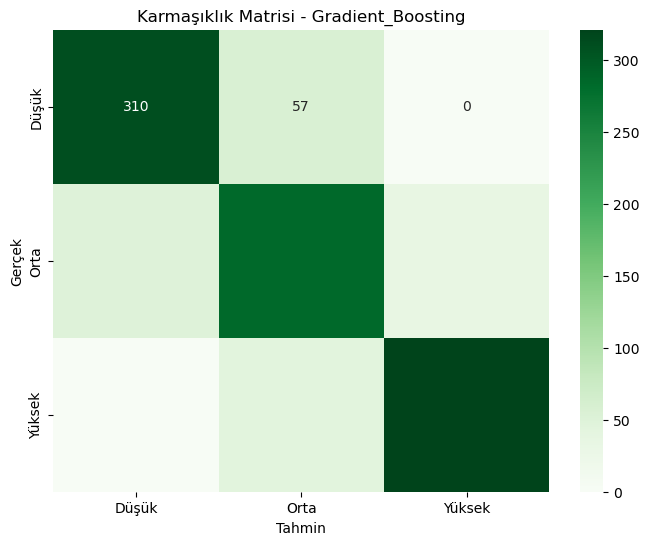


📄 DETAYLI SINIFLANDIRMA RAPORU:
              precision    recall  f1-score   support

       Düşük       0.86      0.84      0.85       367
        Orta       0.74      0.77      0.75       367
      Yüksek       0.90      0.88      0.89       366

    accuracy                           0.83      1100
   macro avg       0.83      0.83      0.83      1100
weighted avg       0.83      0.83      0.83      1100


💾 MODEL VE SCALER KAYDEDİLİYOR...
✅ Model Kaydedildi: ../models/best_model.pkl
✅ Scaler Kaydedildi: ../models/scaler.pkl

🎉 İŞLEM TAMAM! Analizlerin geri geldi, modelin kaydedildi.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import joblib

# Gerekli Kütüphaneler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modeller
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# --- AYARLAR ---
input_path = '../data/model_ready_data.csv'       # İşlenmiş veri
raw_path = '../data/final_merged_data_fixed.csv'  # Ham veri (Scaler eğitimi için)
img_save_dir = '../images'
model_save_dir = '../models'

if not os.path.exists(img_save_dir): os.makedirs(img_save_dir)
if not os.path.exists(model_save_dir): os.makedirs(model_save_dir)

print(f"{'='*60}")
print("🚀 ADIM 7-8-9-10: TAM KAPSAMLI ANALİZ VE KAYIT")
print(f"{'='*60}")

# 1. VERİYİ YÜKLE
if not os.path.exists(input_path):
    print("❌ HATA: Veri dosyası bulunamadı! Önce 03 nolu dosyayı çalıştır.")
else:
    df = pd.read_csv(input_path)
    X = df.drop('Risk_Category', axis=1)
    y = df['Risk_Category']

    # Eğitim ve Test Ayrımı
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # 2. MODELLER VE PARAMETRELER (Adım 7 & 8)
    model_params = {
        'Random_Forest': {
            'model': RandomForestClassifier(random_state=42),
            'params': {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
        },
        'SVM': {
            'model': SVC(random_state=42, probability=True),
            'params': {'C': [1, 10], 'kernel': ['rbf']}
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {'n_neighbors': [5, 7, 9], 'weights': ['distance']}
        },
        'Gradient_Boosting': {
            'model': GradientBoostingClassifier(random_state=42),
            'params': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
        }
    }

    scores = []
    best_models = {}

    print("\n⚙️ HİPERPARAMETRE ANALİZİ VE MODEL EĞİTİMİ BAŞLIYOR...\n")

    for model_name, mp in model_params.items():
        start = time.time()
        print(f"👉 {model_name} eğitiliyor...")
        
        # GridSearch
        clf = GridSearchCV(mp['model'], mp['params'], cv=5, n_jobs=-1)
        clf.fit(X_train, y_train)
        
        elapsed = time.time() - start
        
        scores.append({
            'Model': model_name,
            'Test_Acc': clf.score(X_test, y_test),
            'Best_Params': clf.best_params_,
            'Time': round(elapsed, 2)
        })
        
        best_models[model_name] = clf.best_estimator_
        print(f"   ✅ Başarı: %{clf.score(X_test, y_test)*100:.2f} | En İyi Ayar: {clf.best_params_}")

    # 3. SONUÇ TABLOSU (Adım 10)
    df_results = pd.DataFrame(scores).sort_values(by='Test_Acc', ascending=False)
    
    print(f"\n{'='*60}")
    print("🏆 FİNAL KARŞILAŞTIRMA TABLOSU")
    print(f"{'='*60}")
    pd.set_option('display.max_colwidth', None)
    print(df_results[['Model', 'Test_Acc', 'Best_Params']])

    # Şampiyonu Seç
    champion_name = df_results.iloc[0]['Model']
    champion_model = best_models[champion_name]
    print(f"\n🌟 ŞAMPİYON MODEL: {champion_name}")

    # 4. KARMAŞIKLIK MATRİSİ (Adım 9)
    y_pred = champion_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=['Düşük', 'Orta', 'Yüksek'],
                yticklabels=['Düşük', 'Orta', 'Yüksek'])
    plt.title(f'Karmaşıklık Matrisi - {champion_name}')
    plt.xlabel('Tahmin'); plt.ylabel('Gerçek')
    plt.savefig(f"{img_save_dir}/Final_Confusion_Matrix.png")
    plt.show()

    print("\n📄 DETAYLI SINIFLANDIRMA RAPORU:")
    print(classification_report(y_test, y_pred, target_names=['Düşük', 'Orta', 'Yüksek']))

    # 5. KAYIT İŞLEMİ (ARAYÜZ İÇİN ŞART)
    print(f"\n{'='*60}")
    print("💾 MODEL VE SCALER KAYDEDİLİYOR...")
    
    # Modeli Kaydet
    joblib.dump(champion_model, f'{model_save_dir}/best_model.pkl')
    print(f"✅ Model Kaydedildi: {model_save_dir}/best_model.pkl")

    # Scaler'ı Kaydet (Arayüzde hata almamak için ham veriye göre fit ediyoruz)
    if os.path.exists(raw_path):
        df_raw = pd.read_csv(raw_path)
        # Modelin eğitiminde kullandığımız sayısal sütunlar
        num_cols = ['Age', 'Avg_Daily_Usage_Hours', 'num_app_switches', 'notification_count', 'Sleep_Hours_Per_Night', 'Addiction_Index', 'Digital_Stress_Load']
        
        # Eğer Feature Engineering yaptıysak o sütunları da oluşturup öyle scale etmeliyiz
        # Basitlik adına temel sütunları alalım (Eğer hata verirse burayı güncelleriz)
        available_cols = [c for c in num_cols if c in df_raw.columns]
        
        scaler = StandardScaler()
        scaler.fit(df_raw[available_cols])
        joblib.dump(scaler, f'{model_save_dir}/scaler.pkl')
        print(f"✅ Scaler Kaydedildi: {model_save_dir}/scaler.pkl")
    else:
        print("⚠️ Uyarı: Ham veri bulunamadı, Scaler kaydedilemedi.")

    print("\n🎉 İŞLEM TAMAM! Analizlerin geri geldi, modelin kaydedildi.")